<a href="https://colab.research.google.com/github/rosafilgueira/Seminar_MUIA/blob/main/Colab/Spark_Colab_Pyspark_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connecting Google Drive to Colab

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing Apache Spark

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 38.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=5f10269617aaf7a7b83c03eb5abc8d45f38786f2e9e00d0afdf5764da4e60a7f
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [5]:
!ls

sample_data  spark-3.2.1-bin-hadoop3.2	spark-3.2.1-bin-hadoop3.2.tgz


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

# Creating an Apache Spark section

In [20]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

In [6]:
spark

In [10]:
!ls

sample_data  spark-3.2.1-bin-hadoop3.2	spark-3.2.1-bin-hadoop3.2.tgz


# Creating my first RDDs

In [16]:
file_path="./sample_data/"
sc = spark.sparkContext
textFile = sc.textFile(file_path+"README.md")
textFile.count()

19

# WordCount

In [17]:
wordCounts = textFile.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a, b: a+b)
output=wordCounts.collect()
for (word, count) in output:
  print("%s: %i" % (word, count))

directory: 1
datasets: 1
*: 3
`california_housing_data*.csv`: 1
is: 4
housing: 1
1990: 1
more: 1
at:: 2
https://developers.google.com/machine-learning/crash-course/california-housing-data-description: 1
`mnist_*.csv`: 1
of: 2
[Anscombe's: 1
was: 2
originally: 1
in: 2
Anscombe,: 1
F.: 1
'Graphs: 1
American: 1
Statistician.: 1
(1):: 1
prepared: 1
This: 1
includes: 1
a: 3
few: 1
sample: 2
to: 1
get: 1
you: 1
started.: 1
California: 1
data: 1
from: 1
the: 3
US: 1
Census;: 1
information: 1
available: 1
small: 1
[MNIST: 1
database](https://en.wikipedia.org/wiki/MNIST_database),: 1
which: 1
described: 2
http://yann.lecun.com/exdb/mnist/: 1
`anscombe.json`: 1
contains: 1
copy: 2
quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet);: 1
it: 1
J.: 1
(1973).: 1
Statistical: 1
Analysis'.: 1
27: 1
17-21.: 1
JSTOR: 1
2682899.: 1
and: 1
our: 1
by: 1
[vega_datasets: 1
library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.

# Flat Map vs Map

What is the difference between Spark map() vs flatMap() is a most asked interview question, if you are taking an interview on Spark (Java/Scala/PySpark), so let’s understand the differences with examples? Regardless of an interview, you have to know the differences as this is also one of the most used Spark transformations.

   - map() – Spark map() transformation applies a function to 
each row in a DataFrame/Dataset and returns the new transformed Dataset.
  - flatMap() – Spark flatMap() transformation flattens the DataFrame/Dataset after applying the function on every element and returns a new transformed Dataset. The returned Dataset will return more rows than the current DataFrame.

Let us consider a input file as a text file and it contains some sentence in it as shown below.

Our task is to apply both map and flat map transformation one by one and observe the results produced to understand the working and gain knowledge on where to use Map and Flatmap.

We do this by applying split() function on top Map() and FlatMap() in PySpark



In [26]:
input_rdd = sc.textFile("./data/inputfile.txt")
input_rdd.count()

5

## Map Operation

Map is a type of Spark Transformation, which is used to perform operation on the record level. Spark Map operation applies logic to be performed, defined by the custom code of developers on each collections in RDD and provides the results for each row as a new collection of RDD. 


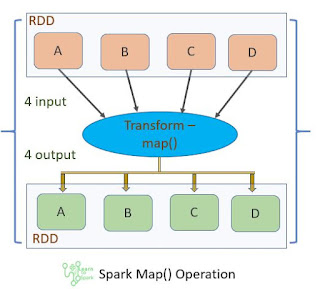

In simple words, Map transformation transforms the collection of RDD of given length say L into processed RDD of the same length L. Typically, the number of records or elements between input and output RDD will remains same. Now it time for some hands-on, let us apply map operation to the given input file with split function in it and check the count of input and output lines of records produced.

In [27]:
map_rdd=input_rdd.map(lambda x: x.split(' '))
map_rdd.collect()

[['this', 'part', 'is', 'for', 'beginners'],
 ['to', 'learn', 'spark', 'and', 'the', 'difference'],
 ['between', 'map', 'and', 'flatmap'],
 ['happy', 'learning'],
 ['Enjoy']]

In [28]:
print(input_rdd.count())
print(map_rdd.count())

5
5


From the output, it is evident that while using map function number of output records will exactly match the number of input records passed to process. We can check the number of records by using count() function as shown in the below diagram. We can observe both input and output have record count of 5.

## flatMap

FlatMap in Apache Spark is a transformation operation that results in zero or more elements to the each element present in the input RDD. It is similar to the Map function, it applies the user built logic to the each records in the RDD and returns the output records as new RDD. In flatmap(), if the input RDD with length say L is passed on to the user defined logic, then it produces the output RDD of different length say M.

![image.png](https://1.bp.blogspot.com/-gCv_kZ-_nRQ/Xkfm0TSjcUI/AAAAAAAABJE/ImDHY8I1bgQOlU2Tc1zArSMyeBzVciLnACLcBGAsYHQ/s1600/flatmap.JPG)




In [29]:
flatmap_rdd=input_rdd.flatMap(lambda x: x.split(' '))
flatmap_rdd.collect()

['this',
 'part',
 'is',
 'for',
 'beginners',
 'to',
 'learn',
 'spark',
 'and',
 'the',
 'difference',
 'between',
 'map',
 'and',
 'flatmap',
 'happy',
 'learning',
 'Enjoy']

We can observe that the number of input rows passed to flatmap is not equal to the number of output we got. By applying the count() function on top of flatmap_rdd, we can get the number of records in it. 

In [30]:
print(input_rdd.count())
print(flatmap_rdd.count())

5
18


We can notice the input RDD has 5 records whereas output flatten RDD has 18 records. Flatmap() is usually used in getting the number of words.

As follows, we have another two (similar) flatMap examples

In [31]:
# Example 1
d1 = ["This is an sample application to see the FlatMap operation in PySpark"] 
rdd1 = sc.parallelize(d1)
rdd2 = rdd1.flatMap(lambda x: x.split(" "))
rdd2.foreach(print)

In [33]:
#Example 2
sc.parallelize([3,4,5]).flatMap(lambda x: range(1,x)).collect()

[1, 2, 1, 2, 3, 1, 2, 3, 4]